In [2047]:
import pandas as pd
import os
from os.path import exists
import re
import wordsegment as ws
from wordsegment import load, segment, clean
load()
import enchant
english_dict = enchant.Dict("en_US")

import nltk
# nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/masud/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2048]:
words_found = ''
normal_words_found = ''
slangified_words_found = ''

In [2049]:
slangification_map={
    '0': ['o'],
    '1': ['i', 'l', 't'],
    '2': ['z'],
    '3': ['e', 's'],
    '4': ['a', 'r'],
    '5': ['s'],
    '6': ['g'],
    '7': ['t'],
    '8': ['b'],
    '9': ['g'],
    '@': ['a'],
    '!': ['i'],
    '$': ['s'],
}

In [2050]:
re.findall('[' + ''.join(slangification_map.keys()) + ']{1,1}', '[23ma[4s1ud12$')

['2', '3', '4', '1', '1', '2', '$']

In [2051]:
# Considering all slangifying chars will be slangified all at once, if found
def slangify(username):
    
    slang_chars = re.findall('[' + ''.join(slangification_map.keys()) + ']{1,1}', username)
    # print(slang_chars)
    
    
    if len(slang_chars) > 0:
        
        transformed_usernames=[username]
        for char in slang_chars:
            
            replace_vals = slangification_map[char]
            temp = []
            
            for r_v in replace_vals:
                for t_u in transformed_usernames:
                    temp.append( t_u.replace(char, r_v) )
            
            transformed_usernames = temp
        
        
        transformed_usernames = list(set(transformed_usernames))
#         print('Transformation is finished', transformed_usernames)
        
        return transformed_usernames
    
    else:
        return []
    
print('test')
print(slangify('m.1@$udlov3r'))
print(slangify('masud'))

test
['m.lasudlover', 'm.iasudlover', 'm.tasudlovsr', 'm.lasudlovsr', 'm.tasudlover', 'm.iasudlovsr']
[]


In [2052]:
# extract meaningful words
def extract_meaningful_chunks(username):
    
    chunks_based_on_word_segmentation = segment(username)
#     print(username, len(username))
#     print(chunks_based_on_word_segmentation)
    
    meaningful_chunks = []
    sentiment_score = 0
    length = 0
    for chunk in chunks_based_on_word_segmentation:        
        
        if len(chunk) >= 3: # at least 3 letters
            
#             synsets = wordnet.synsets(chunk)
#             if synsets:
#                 synset = synsets[0]
             if english_dict.check(chunk):
#                 print(chunk, 'yo')
                meaningful_chunks.append(chunk)
                length += len(chunk)
    
#     print(length, meaningful_chunks, chunks_based_on_word_segmentation)
    return length, meaningful_chunks, chunks_based_on_word_segmentation

# extract_meaningful_chunks('pttoym.iasudlov.erlov.er')
extract_meaningful_chunks('vandathegod')

(6, ['the', 'god'], ['vanda', 'the', 'god'])

In [2053]:

def extract_max_meaningful_chunkification(slangifications):
    
    max_length = 0
    max_meaningful_chunkification = []
    max_slangification = ''
    max_chunks_based_on_word_segmentation = []
    for slangification in slangifications:

        length, meaningful_chunks, chunks_based_on_word_segmentation = extract_meaningful_chunks(slangification)
        if length > max_length:
            max_length = length
            max_meaningful_chunkification = meaningful_chunks
            max_slangification = slangification
            max_chunks_based_on_word_segmentation = chunks_based_on_word_segmentation

#     print(max_slangification, max_meaningful_chunkification, max_chunks_based_on_word_segmentation)
    return max_slangification, max_meaningful_chunkification, max_chunks_based_on_word_segmentation

extract_max_meaningful_chunkification(['m.lasudlover', 'm.iasudlover', 'm.tasudlovsr', 'm.lasudlovsr', 'm.tasudlover', 'm.iasudlovsr'])

('m.lasudlover', ['lover'], ['mla', 'sud', 'lover'])

In [2054]:
 
# str1 = "lover"
# str2 = "lovetoym.iasudlov.erlov.er"
def extract_position(str1, str2, start_pos_str2):
    
    m = len(str1)
    n = len(str2)
 
    j = 0    # Index of str1
#     i = 0    # Index of str2
    i = start_pos_str2
 
    # Traverse both str1 and str2
    # Compare current character of str2 with
    # first unmatched character of str1
    # If matched, then move ahead in str1
 
    while j < m and i < n:
        if str1[j] == str2[i]:
            j = j+1
        i = i + 1
 
        
    end = i
    i = i - 1
    j = m - 1

    while j > -1 and i > start_pos_str2 - 1:
        if str1[j] == str2[i]:
            j = j-1
        i = i - 1
    i += 2
    start = i

    return start, end

str1 = "lover"
str2 = "lovetoym.iasudlov.erlov.er"
extract_position(str1, str2, 0)

(15, 20)

In [2055]:
# str1 = "lover"
# str2 = "lovetoym.iasudlov.erlov.er"
def is_subsequence(str1, str2, start_pos_str2):
    
    m = len(str1)
    n = len(str2)
 
    j = 0    # Index of str1
#     i = 0    # Index of str2
    i = start_pos_str2
 
    # Traverse both str1 and str2
    # Compare current character of str2 with
    # first unmatched character of str1
    # If matched, then move ahead in str1
 
    while j < m and i < n:
        if str1[j] == str2[i]:
            j = j+1
        i = i + 1
 
    return j == m

str1 = "zlover"
str2 = "lovetoym.iasudlov.erlov.er"
extract_position(str1, str2, 0)

(1, 26)

In [2056]:

def perform_chunkification_mapping(max_meaningful_chunkification, max_slangification, 
                                   chunkification_type,
                                  username) :
    
    global words_found
    global normal_words_found
    global slangified_words_found
    
    chunkification_mapping = []    
    index = 0
    for meaningful_chunkification in max_meaningful_chunkification:            
        
        start, end = extract_position(meaningful_chunkification, max_slangification, index)
        index = end
        
#         print(meaningful_chunkification, max_slangification)
#         print(start, end)
    
        if chunkification_type == 'slangified':
            if is_subsequence(meaningful_chunkification, username, 0):
                continue

        words_found =  words_found + ' ' + meaningful_chunkification
        
        if chunkification_type == 'slangified':
            slangified_words_found =  slangified_words_found + ' ' + meaningful_chunkification
        else:
            normal_words_found =  normal_words_found + ' ' + meaningful_chunkification
            
        chunkification_mapping.append({
            'word': meaningful_chunkification,
            'start': start - 1,
            'end': end - 1,
            'type': chunkification_type,
            'withJunk': (end - start + 1) > len(meaningful_chunkification),
        })
    
#     print(chunkification_mapping)

    return chunkification_mapping

perform_chunkification_mapping(['toy', 'lover', 'lover'], 'pttoym.iasudlov.erlov.er', 'normal', 'pttoym.iasudlov.erlov.er')

[{'word': 'toy', 'start': 2, 'end': 4, 'type': 'normal', 'withJunk': False},
 {'word': 'lover', 'start': 12, 'end': 17, 'type': 'normal', 'withJunk': True},
 {'word': 'lover', 'start': 18, 'end': 23, 'type': 'normal', 'withJunk': True}]

In [2057]:
def printMapping(mapping):
    
    for elem in mapping:
        print(elem)

printMapping([{'word': 'toy', 'start': 2, 'end': 4, 'type': 'normal', 'withJunk': False},
 {'word': 'lover', 'start': 12, 'end': 17, 'type': 'normal', 'withJunk': True},
 {'word': 'lover', 'start': 18, 'end': 23, 'type': 'normal', 'withJunk': True}])

{'word': 'toy', 'start': 2, 'end': 4, 'type': 'normal', 'withJunk': False}
{'word': 'lover', 'start': 12, 'end': 17, 'type': 'normal', 'withJunk': True}
{'word': 'lover', 'start': 18, 'end': 23, 'type': 'normal', 'withJunk': True}


In [2058]:
def get_used_unused_mapping(username, mapping):
    
    used_flag = [False] * len(username)
    for elem in mapping:
        
        for index in range(elem['start'], elem['end'] + 1):
            used_flag[index] = True
            
#     print(used_flag)
    return used_flag

get_used_unused_mapping('pt7oym.1@$udlov.3rlov.3r', [{'word': 'toy', 'start': 2, 'end': 4, 'type': 'normal', 'withJunk': False},
{'word': 'lover', 'start': 12, 'end': 17, 'type': 'normal', 'withJunk': True},
{'word': 'lover', 'start': 18, 'end': 23, 'type': 'normal', 'withJunk': True}])

[False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [2059]:
def extract_unused_blocks(used_unused_mapping):
    
    index = 0
    start = -1
    unused_blocks = []
    while index < len(used_unused_mapping):
        
        
        if used_unused_mapping[index] == False:
            if start == -1:
                start = index
        else:
            if start != -1:
                end = index - 1
                unused_blocks.append((start, end))
                start = -1
        
        index += 1
    
    if start != -1:
        unused_blocks.append((start, len(used_unused_mapping) - 1))
    
#     print(unused_blocks)

    return unused_blocks

extract_unused_blocks([False, False, True, True, True, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True])

[(0, 1), (5, 11)]

In [2060]:
def extract_digit_chunkification(blocks, username, chunkification_type):
    
    mapping = []
    for block in blocks:
        start, end = block
#         print(start, end)
        string_block = username[start: end + 1]
        digit_block_list = re.findall('\d+', string_block)
        index = 0 # starting index
        for digit_block in digit_block_list:
            
            start_index_in_block = string_block.find(digit_block, index)
            end_index_in_block = start_index_in_block + len(digit_block) - 1
            index = end_index_in_block + 1
            
            start_index_in_username = start + start_index_in_block
            end_index_in_username = start + end_index_in_block
            
            
#             print(start_index_in_block, end_index_in_block, index)
            mapping.append({
                'word': digit_block,
                'start': start_index_in_username,
                'end': end_index_in_username,
                'type': chunkification_type,
                'more_than_one': (end_index_in_username - start_index_in_username + 1) > 1,
            })
    
#     print(mapping)
    
    return mapping

extract_digit_chunkification([(0, 1), (5, 11)], 'pt7oym.1@$udlov.3rlov.3r', 'digits')
extract_digit_chunkification([(5, 19)], 'karma2mas123sud123f3lover3r', 'digits')

[{'word': '2', 'start': 5, 'end': 5, 'type': 'digits', 'more_than_one': False},
 {'word': '123',
  'start': 9,
  'end': 11,
  'type': 'digits',
  'more_than_one': True},
 {'word': '123',
  'start': 15,
  'end': 17,
  'type': 'digits',
  'more_than_one': True},
 {'word': '3',
  'start': 19,
  'end': 19,
  'type': 'digits',
  'more_than_one': False}]

In [2061]:
def extract_name_chunkification(blocks, username, chunkification_type):
    
    mapping = []
    for block in blocks:
        start, end = block
#         print(start, end)
        string_block = username[start: end + 1]
        name_block_list = re.findall('[a-z]+', string_block)
        index = 0 # starting index
        for name_block in name_block_list:
            
            start_index_in_block = string_block.find(name_block, index)
            end_index_in_block = start_index_in_block + len(name_block) - 1
            index = end_index_in_block + 1
            
            start_index_in_username = start + start_index_in_block
            end_index_in_username = start + end_index_in_block
            
            
#             print(start_index_in_block, end_index_in_block, index)
            mapping.append({
                'word': name_block,
                'start': start_index_in_username,
                'end': end_index_in_username,
                'type': chunkification_type,
            })
    
#     print(mapping)
    
    return mapping

extract_name_chunkification([(0, 7), (5, 11)], '3masud..@4rr', 'name')
# extract_name_chunkification([(5, 19)], '', 'name')

[{'word': 'masud', 'start': 1, 'end': 5, 'type': 'name'},
 {'word': 'd', 'start': 5, 'end': 5, 'type': 'name'},
 {'word': 'rr', 'start': 10, 'end': 11, 'type': 'name'}]

In [2062]:
def extract_word_chunkification(blocks, username, chunkification_type):
    
    mapping = []
    for block in blocks:
        start, end = block
#         print(start, end)
        string_block = username[start: end + 1]
        length, meaningful_chunks, chunks_based_on_word_segmentation = extract_meaningful_chunks(string_block)
        if len(meaningful_chunks) > 0:
            word_mapping = perform_chunkification_mapping(meaningful_chunks,\
                                                    string_block, \
                                                    'normal',\
                                                    username)
            
            for elem in word_mapping:
                elem['start'] += start
                elem['end'] += start
            
            mapping += word_mapping
#     print()
#     printMapping(mapping)
    
    return mapping

extract_word_chunkification([(3,18), (19,29)], '123fight.for@tal.kvanda.thegod', 'normal')

[{'word': 'fight', 'start': 3, 'end': 7, 'type': 'normal', 'withJunk': False},
 {'word': 'for', 'start': 9, 'end': 11, 'type': 'normal', 'withJunk': False},
 {'word': 'talk', 'start': 13, 'end': 17, 'type': 'normal', 'withJunk': True},
 {'word': 'and', 'start': 19, 'end': 21, 'type': 'normal', 'withJunk': False},
 {'word': 'god', 'start': 27, 'end': 29, 'type': 'normal', 'withJunk': False}]

In [2063]:
def get_symbol_chunkification(blocks, username, chunkification_type):
    
    mapping = []
    for block in blocks:
        start, end = block
#         print(start, end)
        string_block = username[start: end + 1]
        
        mapping.append({
            'word': string_block,
            'start': start,
            'end': end,
            'type': chunkification_type,
            'more_than_one': (end - start + 1) > 1,
        })
    
#     print(mapping)
    
    return mapping

get_symbol_chunkification([(0, 1), (5, 5)], '$@abc&99', 'symbol')
# get_symbol_chunkification([(5, 19)], 'karma2mas123sud123f3lover3r', 'digits')

[{'word': '$@', 'start': 0, 'end': 1, 'type': 'symbol', 'more_than_one': True},
 {'word': '&', 'start': 5, 'end': 5, 'type': 'symbol', 'more_than_one': False}]

In [2064]:
def generate_structure(chunkification_mapping):
    
#     for mapping in chunkification_mapping:
#         print(mapping)
    
#     print()
#     print()

    sorted_chunkification_mapping = sorted(chunkification_mapping, key=lambda d: d['start']) 
    structure = []
    for mapping in sorted_chunkification_mapping:
        
        if mapping['type'] == 'symbol':
            structure.append('Sym')
        elif mapping['type'] == 'name':
            structure.append('Nam')
        elif mapping['type'] == 'digits':
            structure.append('Dig')
        elif mapping['type'] == 'normal':
            if mapping['withJunk']:
                structure.append('WrdS')
            else:
                structure.append('Wrd')
        elif mapping['type'] == 'slangified':
            if mapping['withJunk']:
                structure.append('SlgS')
            else:
                structure.append('Slg')
    
    return structure

In [2065]:
def get_username_structure(username):

    # print("slangification")
    # print()
    chunks = slangify(username)
    chunkification_type = 'slangified'
    max_slangification, max_meaningful_chunkification,\
        max_chunks_based_on_word_segmentation = extract_max_meaningful_chunkification(chunks)

    # chunks = slangify('masudh@ppy')
    chunkification_mapping = []
    slang_chunkification_mapping = []
    if len(max_meaningful_chunkification) > 0:
        slang_chunkification_mapping = perform_chunkification_mapping(max_meaningful_chunkification,\
                                                                max_slangification, \
                                                                chunkification_type, \
                                                                username)

    chunkification_mapping += slang_chunkification_mapping
    # print()
    # print("slangification ouput")
    # printMapping(chunkification_mapping)

    used_unused_mapping = get_used_unused_mapping(username, chunkification_mapping)
    # print()

    # print(username)
    unused_blocks = extract_unused_blocks(used_unused_mapping)
    # print()


    # print("digits")
    # print()
    digit_chunkification_mapping = extract_digit_chunkification(unused_blocks, \
                                                                username, \
                                                               'digits')

    chunkification_mapping += digit_chunkification_mapping
    # print()
    # print("digits ouput")
    # printMapping(chunkification_mapping)

    used_unused_mapping = get_used_unused_mapping(username, chunkification_mapping)
    # print()

    # print(username)
    unused_blocks = extract_unused_blocks(used_unused_mapping)
    # print()

    # print("words")
    # print()

    word_chunkification_mapping = extract_word_chunkification(unused_blocks, \
                                                                username, \
                                                               'normal')

    chunkification_mapping += word_chunkification_mapping
    # print()
    # print("words ouput")
    # printMapping(chunkification_mapping)

    used_unused_mapping = get_used_unused_mapping(username, chunkification_mapping)
    # print()

    # print(username)
    unused_blocks = extract_unused_blocks(used_unused_mapping)
    # print()

    # print("names")
    # print()

    name_chunkification_mapping = extract_name_chunkification(unused_blocks, \
                                                                username, \
                                                               'name')

    chunkification_mapping += name_chunkification_mapping
    # print()
    # print("names ouput")
    # printMapping(chunkification_mapping)

    used_unused_mapping = get_used_unused_mapping(username, chunkification_mapping)
    # print()

    # print(username)
    unused_blocks = extract_unused_blocks(used_unused_mapping)
    # print()

    # print("symbol")
    # print()

    symbol_chunkification_mapping = get_symbol_chunkification(unused_blocks, username, 'symbol')

    chunkification_mapping += symbol_chunkification_mapping
    # print()
    # print("symbols ouput")
    # printMapping(chunkification_mapping)

    used_unused_mapping = get_used_unused_mapping(username, chunkification_mapping)
    # print()

    # print(username)
    unused_blocks = extract_unused_blocks(used_unused_mapping)
    # print(unused_blocks)

    structure = generate_structure(chunkification_mapping)
    # print()
#     print(username)
#     print('-'.join(structure))
    return '-'.join(structure)

# username = 'masud@ab'
username = 'vandath.e90god'
# username = 'v.i.r.u.s'
# username = '7oym.1@$udlov.3rlov.3r456'
get_username_structure(username)

'Nam-WrdS-Dig-Wrd'

In [2066]:
forum_list = [
        
        'ethical_hacker',
        'hack_this_site',
        'mpgh',
#         'security_stack_exchange',
#         'garage4hackers',
        'wilderssecurity',
        'offensive_community',
#         'hack_forums',
#         'raidforums',
        # 'google_plus',
#         'facebook',
        # 'twitter',         
]
# forum_list


result_dict = {
        'id': [],
        'forum_name': [], 
        'username': [],
        'name_struct': [],
}
index = 0

for forum_name in forum_list:
    
    data_dir = 'processed/'
    file_location = data_dir + forum_name + '_usernames.csv'

    data = pd.read_csv(file_location)
    
    print(forum_name)
    
    print(data[data.duplicated(keep=False)])
    print(data.isnull().sum())
#     print(data.columns)

    data_map = data.to_dict('records')
    print(forum_name)
    print('total user count', data.shape[0])
#     print()
    print()
    
    for iteration, record in enumerate(data_map):
        
        username = record['name'].lower()
        name_struct = get_username_structure(username)
        
        index += 1
        result_dict['id'].append(index)
        result_dict['forum_name'].append(forum_name)
        result_dict['username'].append(username)
        result_dict['name_struct'].append(name_struct)
    
    
result_data = pd.DataFrame.from_dict(result_dict)

ethical_hacker
Empty DataFrame
Columns: [index, name]
Index: []
index    0
name     0
dtype: int64
ethical_hacker
total user count 2262

hack_this_site
Empty DataFrame
Columns: [index, name]
Index: []
index    0
name     0
dtype: int64
hack_this_site
total user count 9409

mpgh
Empty DataFrame
Columns: [index, name]
Index: []
index    0
name     0
dtype: int64
mpgh
total user count 4409

wilderssecurity
Empty DataFrame
Columns: [index, name]
Index: []
index    0
name     0
dtype: int64
wilderssecurity
total user count 2109

offensive_community
Empty DataFrame
Columns: [index, name]
Index: []
index    0
name     0
dtype: int64
offensive_community
total user count 11517



In [2067]:
print(result_data['forum_name'].unique())

['ethical_hacker' 'hack_this_site' 'mpgh' 'wilderssecurity'
 'offensive_community']


In [2068]:
# print(words_found)

import matplotlib.pyplot as plt
def draw_wordcloud(wordcloud, size):
    plt.figure(figsize = size)
    plt.imshow(wordcloud) 
    plt.axis("off")
    
from wordcloud import WordCloud, STOPWORDS
import random


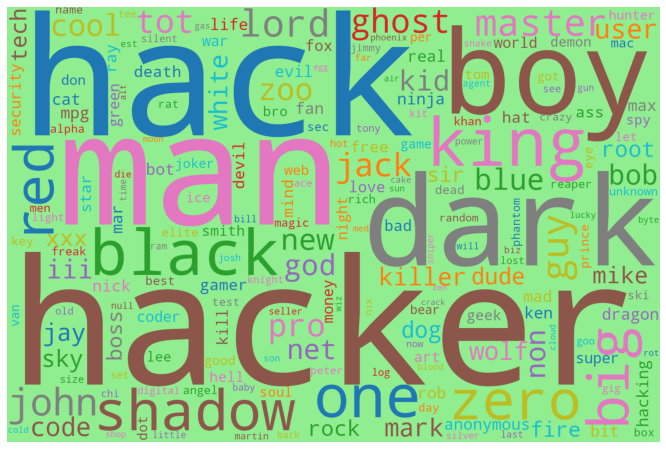

In [2069]:
wordcloud = WordCloud(width = 1500, 
                      height = 1000, 
                      random_state = 42, 
                      collocations = False, 
                      background_color = 'lightgreen', 
                      colormap = 'tab10', 
                      stopwords = STOPWORDS).generate(words_found)

draw_wordcloud(wordcloud, (12,8))

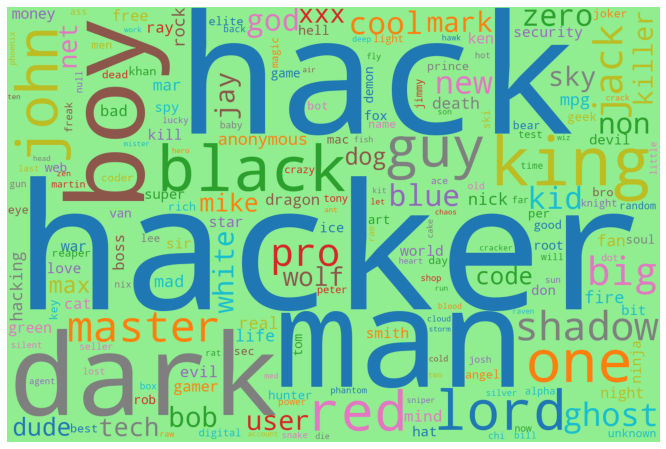

In [2070]:
wordcloud = WordCloud(width = 1500, 
                      height = 1000, 
                      random_state = 42, 
                      collocations = False, 
                      background_color = 'lightgreen', 
                      colormap = 'tab10', 
                      stopwords = STOPWORDS).generate(normal_words_found)

draw_wordcloud(wordcloud, (12,8))

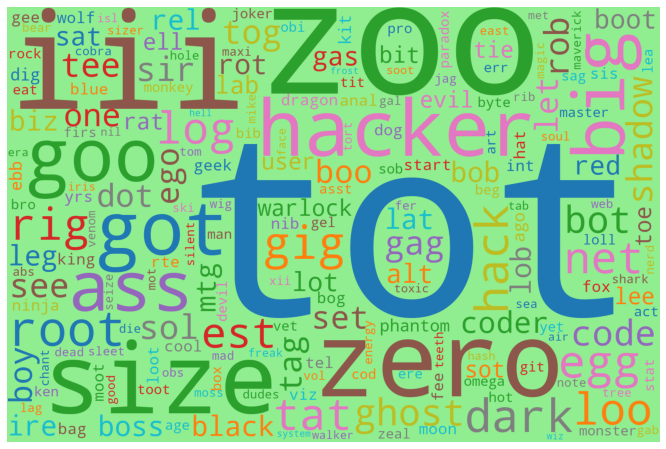

In [2071]:
wordcloud = WordCloud(width = 1500, 
                      height = 1000, 
                      random_state = 42, 
                      collocations = False, 
                      background_color = 'lightgreen', 
                      colormap = 'tab10', 
                      stopwords = STOPWORDS).generate(slangified_words_found)

draw_wordcloud(wordcloud, (12,8))

In [2072]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2073]:
# result_data.to_csv('name_structs_fb_2.csv')


In [2074]:
# # check in two dataset
print(english_dict.check('skymaster'))
# l = [False] * 3
# l
segment('skymaster')

False


['skymaster']

In [2075]:
synsets = wordnet.synsets('skymaster')
if synsets:
    synset = synsets[0]
    synsets[0].pos()

In [2076]:
# a = 'mas123df124'
# a.find('12', 5)

# re.findall('[a-z]+', 'abc.rt')

In [2077]:
# ans = nltk.pos_tag(['excellent'])
  
# # ans returns a list of tuple
# val = ans[0][1]
  
# # checking if it is a noun or not
# if(val == 'NN' or val == 'NNS' or val == 'NNPS' or val == 'NNP'):
#     print( " is a noun.")
# else:
#     print( " is not a noun.")

In [2078]:
segment('wannab')

['wannab']